# Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [3]:
zoo = pd.read_csv(r"C:\Users\Binita Mandal\Desktop\finity\KNN ASSIGNMENT\zoo.csv")

In [4]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
zoo.head(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [6]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64


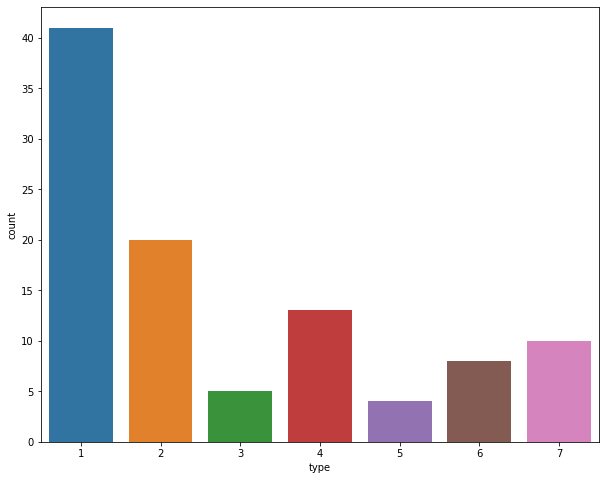

In [7]:
# To find out many of each target in our data.
print(zoo.type.value_counts())
plt.figure(figsize = (10,8))
sns.countplot(zoo.type)
plt.show()

In [8]:
data = zoo.copy()
data.drop("animal name",axis = 1,inplace = True)

In [9]:
x = data.drop("type",axis = 1)
y = data.type.values

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 42)
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (60, 16)
x_test shape :  (41, 16)
y_train shape :  (60,)
y_test shape :  (41,)


# SVM Classification

In [11]:
from sklearn.svm import SVC
svm = SVC(random_state = 42,kernel = "linear")
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
print("Train Accurary : ",svm.score(x_train,y_train))
print("Test Accuray : ",svm.score(x_test,y_test))

Train Accurary :  1.0
Test Accuray :  0.926829268292683


In [12]:
from sklearn.metrics import confusion_matrix,classification_report
cm_svm = confusion_matrix(y_test,y_pred_svm)
cr_svm = classification_report(y_test,y_pred_svm)
print("confusion matrix : \n",cm_svm)
print("classification report : \n",cr_svm)

confusion matrix : 
 [[20  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  0  1  1  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  4]]
classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         2
           5       0.67      1.00      0.80         2
           6       0.83      1.00      0.91         5
           7       1.00      0.80      0.89         5

    accuracy                           0.93        41
   macro avg       0.74      0.83      0.77        41
weighted avg       0.90      0.93      0.91        41



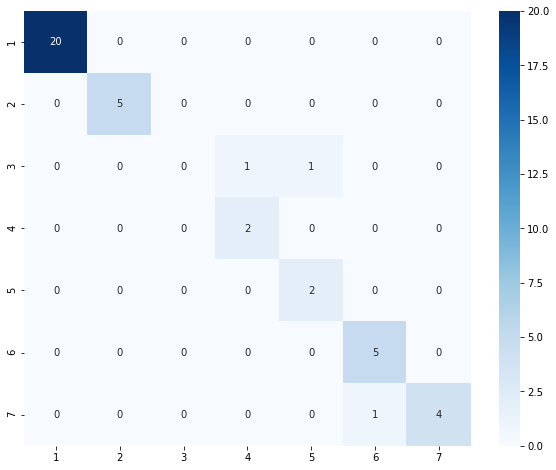

In [13]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_svm,annot = True,cmap = "Blues",xticklabels = np.arange(1,8),yticklabels = np.arange(1,8))
plt.show()

# KNN Classification

Best K value =  1
Best score =  0.9512195121951219


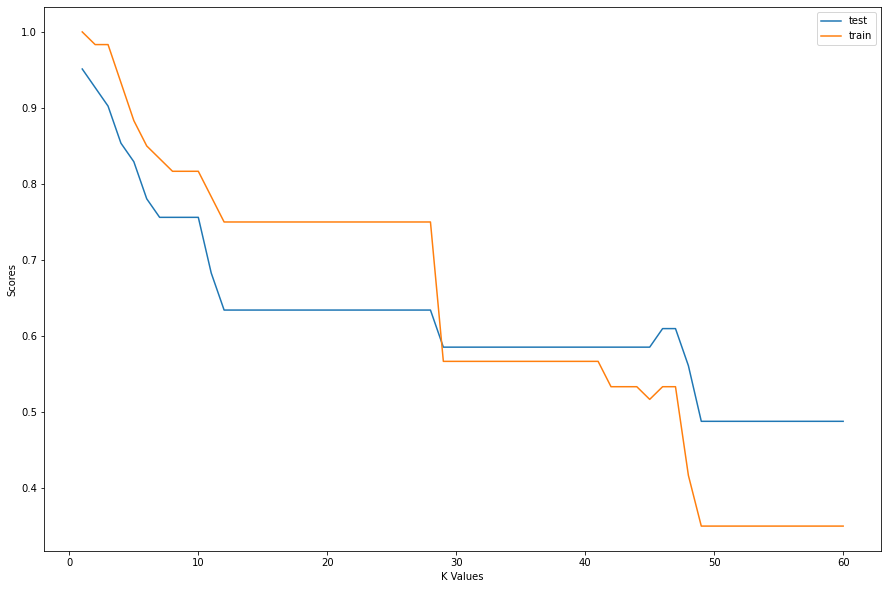

In [14]:
from sklearn.neighbors import KNeighborsClassifier
scr_max = 0
knn_test_score_list = []
knn_train_score_list = []

for i in range(1,x_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    knn_test_scr = knn.score(x_test,y_test)
    knn_test_score_list.append(knn_test_scr)
    knn_train_scr = knn.score(x_train,y_train)
    knn_train_score_list.append(knn_train_scr)
    if knn_test_scr >= scr_max:
        scr_max = knn_test_scr
        index = i

print("Best K value = ",index)
print("Best score = ",scr_max)

plt.figure(figsize = (15,10))
plt.plot(range(1,x_train.shape[0]+1),knn_test_score_list,label = "test")
plt.plot(range(1,x_train.shape[0]+1),knn_train_score_list,label = "train")
plt.legend()
plt.xlabel("K Values")
plt.ylabel("Scores")
plt.show()

In [15]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
cr_knn = classification_report(y_test,y_pred_knn)
cm_knn = confusion_matrix(y_test,y_pred_knn)
print("confusion matrix : \n",cm_knn)
print("classification report : \n",cr_knn)

confusion matrix : 
 [[20  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  4]]
classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         5
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       0.83      1.00      0.91         5
           7       1.00      0.80      0.89         5

    accuracy                           0.95        41
   macro avg       0.93      0.90      0.89        41
weighted avg       0.96      0.95      0.95        41



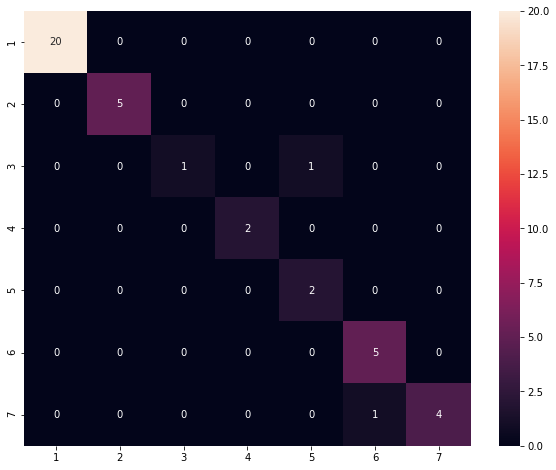

In [16]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_knn,annot = True,xticklabels = np.arange(1,8),yticklabels = np.arange(1,8))
plt.show()

# classification of animals of 3 and 7 shows the false prediction and Between KNN and SVM, Knn has better prediction.